In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
%matplotlib inline

In [2]:
attrition=pd.read_csv('C:\\Users\\Chiranjeevi\\Desktop\\HR Attrition\\HR Attrition.csv')
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
attrition.shape

(1470, 35)

In [4]:
attrition.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
#we have to convert datatype of some variables from int to object(as given in the question)

In [6]:
attrition[['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']]=attrition[['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']].astype(object)

In [7]:
attrition.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                     int64
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# 1 Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E657388E10>,
      dtype=object)

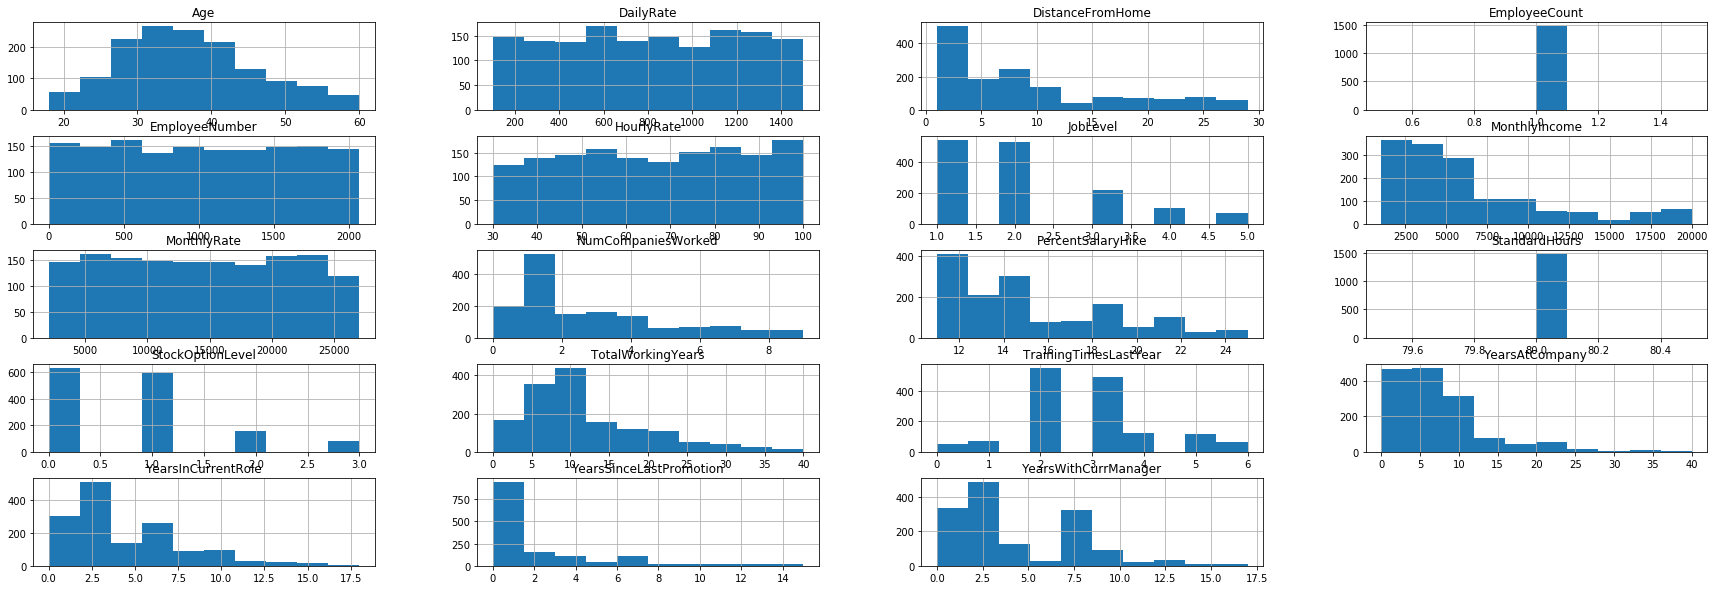

In [8]:
attrition.hist(figsize=[30,10])

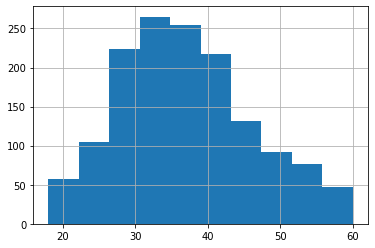

In [9]:
attrition.Age.hist()#checking for histogram of Age variable

In [10]:
attrition.describe()#checking for outliers

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1.0,1024.865306,65.891156,2.063946,6502.931293,14313.103401,2.693197,15.209524,80.0,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,0.0,602.024335,20.329428,1.106940,4707.956783,7117.786044,2.498009,3.659938,0.0,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.0,1.000000,30.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,491.250000,48.000000,1.000000,2911.000000,8047.000000,1.000000,12.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1.0,1020.500000,66.000000,2.000000,4919.000000,14235.500000,2.000000,14.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1.0,1555.750000,83.750000,3.000000,8379.000000,20461.500000,4.000000,18.000000,80.0,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,2068.000000,100.000000,5.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


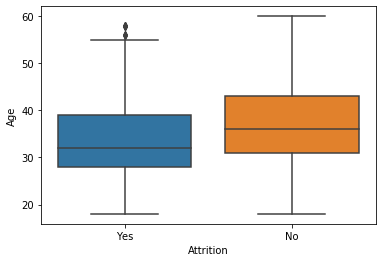

In [11]:
sns.boxplot(x='Attrition',y='Age',data=attrition)#checking for outliers with respect to Age coloumn using boxplot


there is a small but accepted level of outlier in the yes of the above plot

In [12]:
attrition.duplicated().sum()#checking for duplicate values

0

In [13]:
attrition.drop_duplicates()#dropping duplicate values

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [14]:
#checking for Education
#since Eduacation is a categorical variaable here,we check for freq counts

In [15]:
attrition.Education.value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [16]:
# checking for BusinessTravel variable

In [17]:
attrition.BusinessTravel.value_counts()#value_counts is used only for categorical variable

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [18]:
attrition.BusinessTravel.value_counts(normalize=True)# gives value in percentage

Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64

In [19]:
#checking for DailyRate variable
# here DailyRate is a continuos variable,so we perform hist and describe

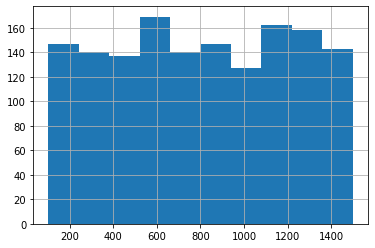

In [20]:
attrition.DailyRate.hist()

In [21]:
attrition.DailyRate.describe()

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

In [22]:
# checking for DistanceFromHome

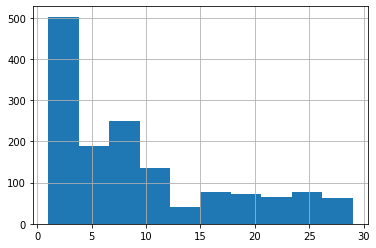

In [23]:
attrition.DistanceFromHome.hist()

In [24]:
attrition.DistanceFromHome.describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [25]:
# checking for Education

In [26]:
attrition.Education.value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [27]:
attrition.Education.describe()

count     1470
unique       5
top          3
freq       572
Name: Education, dtype: int64

In [28]:
# checking for EmployeeCount.hist

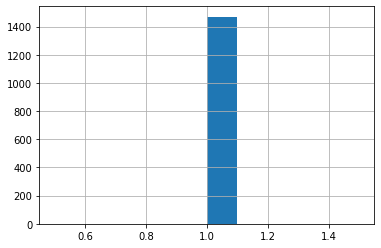

In [29]:
attrition.EmployeeCount.hist()

In [30]:
# checking for EmployeeNumber

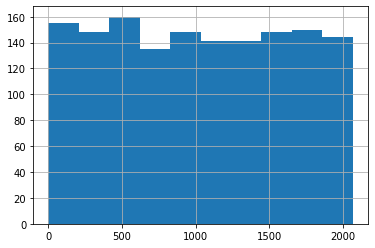

In [31]:
attrition.EmployeeNumber.hist()

In [32]:
# Checking for EnvironmentSatisfaction

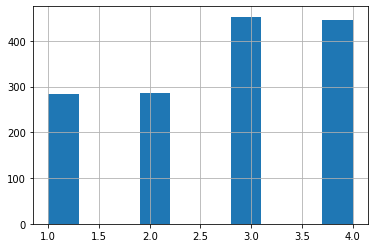

In [33]:
attrition.EnvironmentSatisfaction.hist()

In [34]:
attrition.EnvironmentSatisfaction.describe()

count     1470
unique       4
top          3
freq       453
Name: EnvironmentSatisfaction, dtype: int64

In [35]:
#checking for HourlyRate 

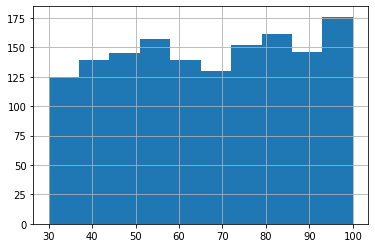

In [36]:
attrition.HourlyRate.hist()

In [37]:
attrition.HourlyRate.describe()

count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64

In [38]:
# checking for JobInvolvement

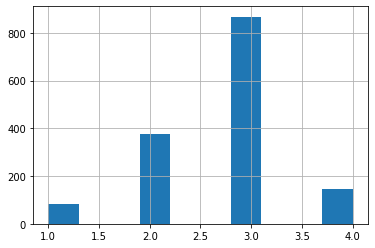

In [39]:
attrition.JobInvolvement.hist()

In [40]:
attrition.JobInvolvement.describe()

count     1470
unique       4
top          3
freq       868
Name: JobInvolvement, dtype: int64

In [41]:
#checking for JobLevel

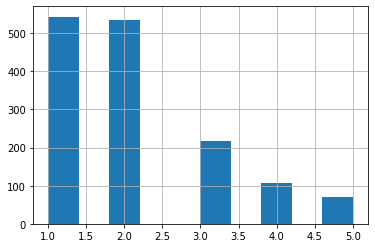

In [42]:
attrition.JobLevel.hist()

In [43]:
attrition.JobLevel.describe()

count    1470.000000
mean        2.063946
std         1.106940
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: JobLevel, dtype: float64

In [44]:
# checking for YearsAtCompany

In [45]:
attrition.YearsAtCompany.describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

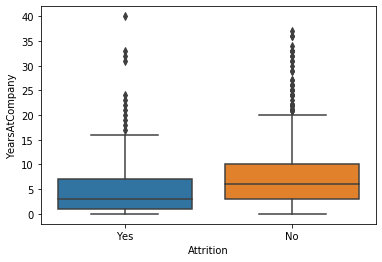

In [46]:
sns.boxplot(x='Attrition',y='YearsAtCompany',data=attrition)#we have outlier here so we  need to replace the outlier with mean value

In [47]:
np.percentile(attrition.YearsAtCompany,np.arange(10,100,10))

array([ 1.,  2.,  3.,  5.,  5.,  7.,  9., 10., 15.])

In [48]:
# checking for Department

In [49]:
attrition.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [50]:
attrition.Department.value_counts(normalize=True)

Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64

In [51]:
#Checking for EducationField

In [52]:
attrition.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [53]:
attrition.EducationField.value_counts(normalize=True)

Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: EducationField, dtype: float64

In [54]:
# checking for Gender

In [55]:
attrition.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [56]:
attrition.Gender.value_counts(normalize=True)

Male      0.6
Female    0.4
Name: Gender, dtype: float64

In [57]:
#checking for JobRole

In [58]:
attrition.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [59]:
attrition.JobRole.value_counts(normalize=True)

Sales Executive              0.221769
Research Scientist           0.198639
Laboratory Technician        0.176190
Manufacturing Director       0.098639
Healthcare Representative    0.089116
Manager                      0.069388
Sales Representative         0.056463
Research Director            0.054422
Human Resources              0.035374
Name: JobRole, dtype: float64

In [60]:
#checking for MaritalStatus

In [61]:
attrition.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [62]:
attrition.MaritalStatus.value_counts(normalize=True)

Married     0.457823
Single      0.319728
Divorced    0.222449
Name: MaritalStatus, dtype: float64

In [63]:
# checking for Over18

In [64]:
attrition.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [65]:
attrition.Over18.value_counts(normalize=True)

Y    1.0
Name: Over18, dtype: float64

In [66]:
#checking for overtime

In [67]:
attrition.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [68]:
attrition.OverTime.value_counts(normalize=True)

No     0.717007
Yes    0.282993
Name: OverTime, dtype: float64

# 2 Missing Value Analysis

In [69]:
attrition.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# 3 Bivariate Analysis

# A. for all continious/numerical variable

# attrition vs age

In [70]:
import scipy.stats as stats
from scipy.stats import ttest_ind

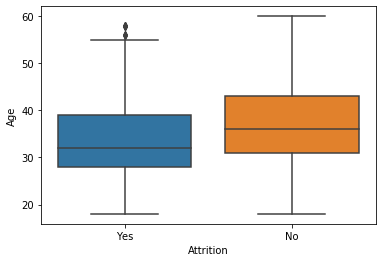

In [71]:
sns.boxplot(x='Attrition',y='Age',data=attrition)

In [72]:
# as Age increases the probability of attrition decreases

In [73]:
y=attrition['Attrition']

In [74]:
cat1 = attrition[attrition['Attrition']=="Yes"]
cat2 = attrition[attrition['Attrition']=='No']         


ttest_ind(cat1['Age'], cat2['Age'])
#There is significant association between age and Attrition

Ttest_indResult(statistic=-6.1786638353072165, pvalue=8.356308021103649e-10)

# attrition vs DailyRate

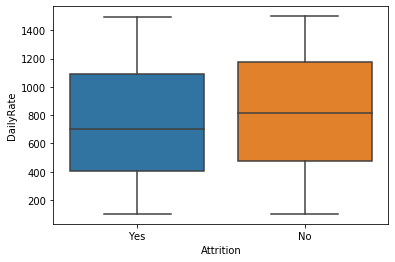

In [75]:
sns.boxplot(x='Attrition',y='DailyRate',data=attrition)

In [76]:
# as DailyRate increases probability of attrition decreases

In [77]:
cat1 = attrition[attrition['Attrition']=="Yes"]
cat2 = attrition[attrition['Attrition']=='No']         


ttest_ind(cat1['DailyRate'], cat2['DailyRate'])
#There is significant association between DailyRate and Attrition because pvalue<0.05

Ttest_indResult(statistic=-2.1740836777017747, pvalue=0.02985816066026497)

# attrition vs DistanceFromHome

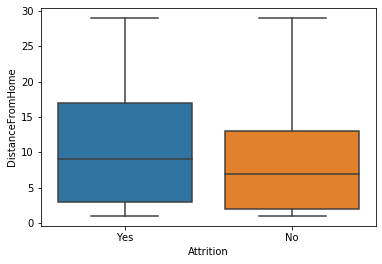

In [78]:
sns.boxplot(x='Attrition',y='DistanceFromHome',data=attrition)

In [79]:
# as  DistanceFromHome increases probability of attrition aslo increases 

In [80]:
cat1 = attrition[attrition['Attrition']=="Yes"]
cat2 = attrition[attrition['Attrition']=='No']         


ttest_ind(cat1['DistanceFromHome'], cat2['DistanceFromHome'])
#There is significant association between DistanceFromHome and Attrition because pvalue<0.5

Ttest_indResult(statistic=2.994708098265125, pvalue=0.0027930600802134266)

# attrion vs EmployeeNumber

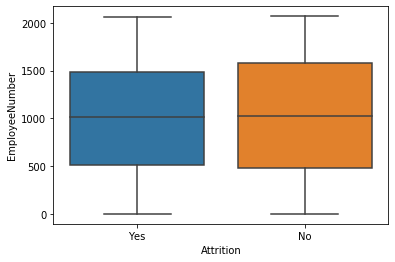

In [81]:
sns.boxplot(x='Attrition',y='EmployeeNumber',data=attrition)

In [82]:
# as EmployeeNumber increases probability of Attrition decreases

In [83]:
cat1 = attrition[attrition['Attrition']=="Yes"]
cat2 = attrition[attrition['Attrition']=='No']         


ttest_ind(cat1['EmployeeNumber'], cat2['EmployeeNumber'])
#There is non-significant association between Employee Number and Attrition

Ttest_indResult(statistic=-0.4052843139019291, pvalue=0.6853275897297122)

# attrition vs HourlyRate

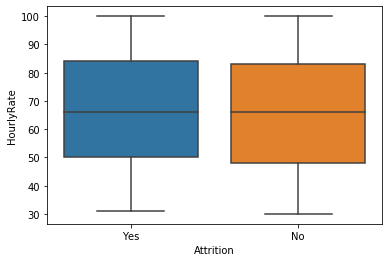

In [84]:
sns.boxplot(x='Attrition',y='HourlyRate',data=attrition)

In [85]:
# as HourlyRate increases probability of Attrition does not change

In [86]:
cat1 = attrition[attrition['Attrition']=="Yes"]
cat2 = attrition[attrition['Attrition']=='No']         


ttest_ind(cat1['HourlyRate'], cat2['HourlyRate'])
#There is non-significant association between HourlyRate and Attrition

Ttest_indResult(statistic=-0.26228987349264493, pvalue=0.7931347689944243)

# attrition vs JobLevel

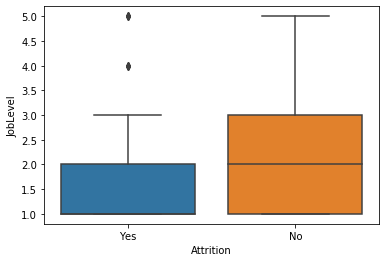

In [87]:
sns.boxplot(x='Attrition',y='JobLevel',data=attrition)

In [88]:
# as JobLevel increases probability of Attrition decreases

In [89]:
cat1 = attrition[attrition['Attrition']=="Yes"]
cat2 = attrition[attrition['Attrition']=='No']         


ttest_ind(cat1['JobLevel'], cat2['JobLevel'])
#There is a significant association between JobLevel and Attrition

Ttest_indResult(statistic=-6.573837830953691, pvalue=6.795384780015255e-11)

# attrition vs MonthlyIncome

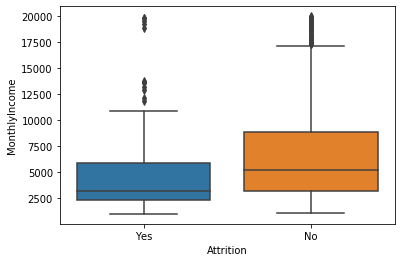

In [90]:
sns.boxplot(x='Attrition',y='MonthlyIncome',data=attrition)

In [91]:
# as MonthlyIncome increases probability of Attrition decreases

In [92]:
cat1 = attrition[attrition['Attrition']=="Yes"]
cat2 = attrition[attrition['Attrition']=='No']         


ttest_ind(cat1['MonthlyIncome'], cat2['MonthlyIncome'])
#There is a significant association between MonthlyIncome and Attrition

Ttest_indResult(statistic=-6.203935765608938, pvalue=7.14736398535381e-10)

# attrition vs MonthlyRate

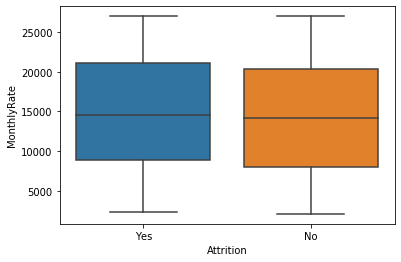

In [93]:
sns.boxplot(x='Attrition',y='MonthlyRate',data=attrition)

In [94]:
# as MonthlyRate increases probability of Attrition does not change

In [95]:
cat1 = attrition[attrition['Attrition']=="Yes"]
cat2 = attrition[attrition['Attrition']=='No']         


ttest_ind(cat1['MonthlyRate'], cat2['MonthlyRate'])
#There is a significant association between MonthlyRate and Attrition

Ttest_indResult(statistic=0.5813058211545318, pvalue=0.5611235982243015)

# attrition vs NumCompaniesWorked

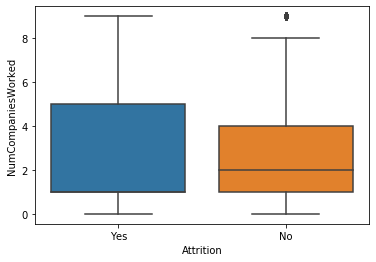

In [96]:
sns.boxplot(x='Attrition',y='NumCompaniesWorked',data=attrition)

In [97]:
# as NumCompaniesWorked increases probability of Attrition aslo increases

In [98]:
cat1 = attrition[attrition['Attrition']=="Yes"]
cat2 = attrition[attrition['Attrition']=='No']         


ttest_ind(cat1['NumCompaniesWorked'], cat2['NumCompaniesWorked'])
#There is a non-significant association between NumCompaniesWorked and Attrition

Ttest_indResult(statistic=1.6680187953544354, pvalue=0.0955252620565195)

# attrition vs PercentSalaryHike

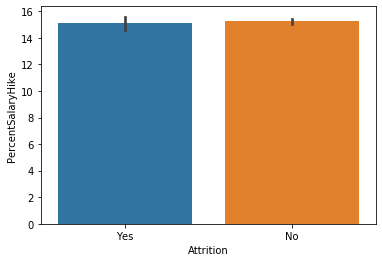

In [99]:
sns.barplot(x='Attrition',y='PercentSalaryHike',data=attrition)

In [100]:
# as PercentSalaryHike increases probability of Attrition does not change

In [101]:
cat1 = attrition[attrition['Attrition']=="Yes"]
cat2 = attrition[attrition['Attrition']=='No']         


ttest_ind(cat1['PercentSalaryHike'], cat2['PercentSalaryHike'])
#There is a non-significant association between PercentSalaryHike and Attrition

Ttest_indResult(statistic=-0.5164573250747643, pvalue=0.6056128238893757)

# attrition vs StockOptionLevel

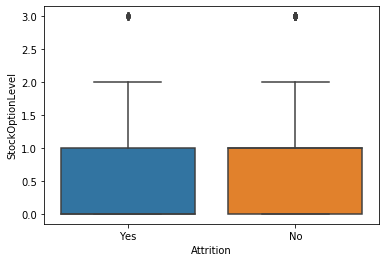

In [102]:
sns.boxplot(x='Attrition',y='StockOptionLevel',data=attrition)

In [103]:
# as StockOptionLevel increases probability of Attrition does not change

In [104]:
cat1 = attrition[attrition['Attrition']=="Yes"]
cat2 = attrition[attrition['Attrition']=='No']         


ttest_ind(cat1['StockOptionLevel'], cat2['StockOptionLevel'])
#There is a significant association between StockOptionLevel and Attrition

Ttest_indResult(statistic=-5.3047620976099115, pvalue=1.3010149660019924e-07)

# attrition vs TotalWorkingYears

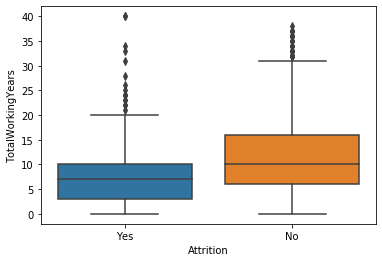

In [105]:
sns.boxplot(x='Attrition',y='TotalWorkingYears',data=attrition)

In [106]:
# as TotalWorkingYears increases probability of Attrition decreases

In [107]:
cat1 = attrition[attrition['Attrition']=="Yes"]
cat2 = attrition[attrition['Attrition']=='No']         


ttest_ind(cat1['TotalWorkingYears'], cat2['TotalWorkingYears'])
#There is a significant association between TotalWorkingYears and Attrition

Ttest_indResult(statistic=-6.6522546135024445, pvalue=4.0618781112668525e-11)

# attrition vs TrainingTimesLastYear

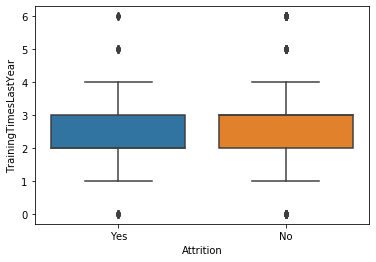

In [108]:
sns.boxplot(x='Attrition',y='TrainingTimesLastYear',data=attrition)

In [109]:
# as TrainingTimesLastYear increases probability of Attrition remains the same

In [110]:
cat1 = attrition[attrition['Attrition']=="Yes"]
cat2 = attrition[attrition['Attrition']=='No']         


ttest_ind(cat1['TrainingTimesLastYear'], cat2['TrainingTimesLastYear'])
#There is a significant association between TotalWorkingYears and Attrition

Ttest_indResult(statistic=-2.2829029923666897, pvalue=0.02257849973720126)

# attrition vs YearsAtCompany

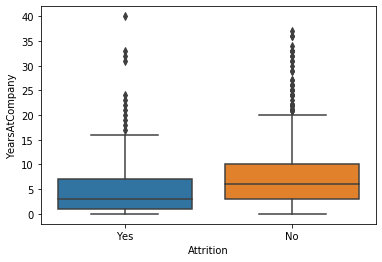

In [111]:
sns.boxplot(x='Attrition',y='YearsAtCompany',data=attrition) 

In [112]:
# as YearsAtCompany increases probability of Attrition decreases

In [113]:
cat1 = attrition[attrition['Attrition']=="Yes"]
cat2 = attrition[attrition['Attrition']=='No']         


ttest_ind(cat1['YearsAtCompany'], cat2['YearsAtCompany'])
#There is a significant association between YearsAtCompany and Attrition

Ttest_indResult(statistic=-5.1963086670254235, pvalue=2.3188716103863033e-07)

# attrition vs YearsInCurrentRole

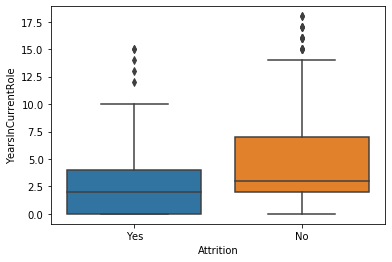

In [114]:
sns.boxplot(x='Attrition',y='YearsInCurrentRole',data=attrition) 

In [115]:
# as YearsInCurrentRole increases probability of Attrition decreases

In [116]:
cat1 = attrition[attrition['Attrition']=="Yes"]
cat2 = attrition[attrition['Attrition']=='No']         


ttest_ind(cat1['YearsInCurrentRole'], cat2['YearsInCurrentRole'])
#There is a significant association between YearsInCurrentRole and Attrition

Ttest_indResult(statistic=-6.232038413295282, pvalue=6.003185843641377e-10)

# attrition vs YearsSinceLastPromotion

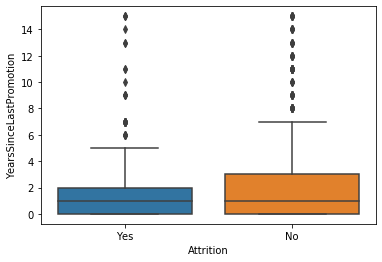

In [117]:
sns.boxplot(x='Attrition',y='YearsSinceLastPromotion',data=attrition) 

In [118]:
# as YearsSinceLastPromotion increases probability of Attrition decreases

In [119]:
cat1 = attrition[attrition['Attrition']=="Yes"]
cat2 = attrition[attrition['Attrition']=='No']         


ttest_ind(cat1['YearsSinceLastPromotion'], cat2['YearsSinceLastPromotion'])
#There is a significant association between YearsSinceLastPromotion and Attrition

Ttest_indResult(statistic=-1.2657876620135298, pvalue=0.2057899591624936)

# attrition vs YearsWithCurrManager

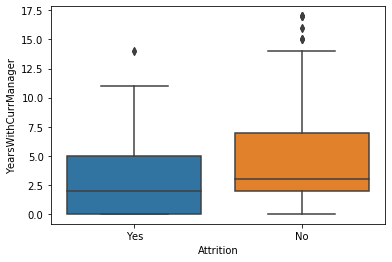

In [120]:
sns.boxplot(x='Attrition',y='YearsWithCurrManager',data=attrition) 

In [121]:
# as YearsWithCurrManager increases probability of Attrition decreases

In [122]:
cat1 = attrition[attrition['Attrition']=="Yes"]
cat2 = attrition[attrition['Attrition']=='No']         


ttest_ind(cat1['YearsWithCurrManager'], cat2['YearsWithCurrManager'])
#There is a significant association between YearsWithCurrManager and Attrition

Ttest_indResult(statistic=-6.059068531868998, pvalue=1.7369867845242207e-09)

# B. for all categorical variable

# attrition vs Education

In [123]:
# in chi-square test the p-value > 0.05 tells the variable is significant which is vice-versa to T-test, where p-value<0.05 is significant

In [124]:
import scipy.stats as stats # we import this for performing t-test
from scipy.stats import ttest_ind

In [125]:
x=pd.crosstab(attrition["Attrition"],attrition["Education"])
print(x)

Education    1    2    3    4   5
Attrition                        
No         139  238  473  340  43
Yes         31   44   99   58   5


In [126]:
x=pd.crosstab(attrition["Attrition"],attrition["Education"],normalize='columns')
print(x)

Education         1         2         3         4         5
Attrition                                                  
No         0.817647  0.843972  0.826923  0.854271  0.895833
Yes        0.182353  0.156028  0.173077  0.145729  0.104167


In [127]:
stats.chi2_contingency(x) 

(0.028731267949872796,
 0.9998977971957901,
 4,
 array([[0.84772929, 0.84772929, 0.84772929, 0.84772929, 0.84772929],
        [0.15227071, 0.15227071, 0.15227071, 0.15227071, 0.15227071]]))

In [128]:
#There is  significant association between attrition and Education because p-value(0.9998977971957901)>0.05

# attrition vs EnvironmentSatisfaction

In [129]:
x=pd.crosstab(attrition["Attrition"],attrition["EnvironmentSatisfaction"])
print(x)

EnvironmentSatisfaction    1    2    3    4
Attrition                                  
No                       212  244  391  386
Yes                       72   43   62   60


In [130]:
x=pd.crosstab(attrition["Attrition"],attrition["EnvironmentSatisfaction"],normalize='columns')
print(x)

EnvironmentSatisfaction         1         2         3         4
Attrition                                                      
No                       0.746479  0.850174  0.863135  0.865471
Yes                      0.253521  0.149826  0.136865  0.134529


In [131]:
stats.chi2_contingency(x) 

(0.0693996252400601,
 0.9952375494476685,
 3,
 array([[0.83131465, 0.83131465, 0.83131465, 0.83131465],
        [0.16868535, 0.16868535, 0.16868535, 0.16868535]]))

In [132]:
#There is  significant association between attrition and Education because p-value(0.9952375494476685)>0.05

# attrition vs Businesstravel

In [133]:
import scipy.stats as stats # we import this for performing t-test
from scipy.stats import ttest_ind

In [134]:
x=pd.crosstab(attrition["Attrition"],attrition["BusinessTravel"])
print(x)

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No                     138                208            887
Yes                     12                 69            156


In [135]:
x=pd.crosstab(attrition["Attrition"],attrition["BusinessTravel"],normalize='columns')
print(x)

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No                    0.92           0.750903       0.850431
Yes                   0.08           0.249097       0.149569


In [136]:
stats.chi2_contingency(x) 

(0.1077319760669711,
 0.9475590822494744,
 2,
 array([[0.84044466, 0.84044466, 0.84044466],
        [0.15955534, 0.15955534, 0.15955534]]))

In [137]:
#There is significant association between attrition and BusinessTravel because p-value(0.9475590822494744)>0.05

therefore BusinessTravel has no influence on Attrition

# attrition vs Department

In [138]:
x=pd.crosstab(attrition["Attrition"],attrition["Department"])
print(x)

Department  Human Resources  Research & Development  Sales
Attrition                                                 
No                       51                     828    354
Yes                      12                     133     92


In [139]:
x=pd.crosstab(attrition["Attrition"],attrition["Department"],normalize='columns')
print(x)

Department  Human Resources  Research & Development     Sales
Attrition                                                    
No                 0.809524                0.861602  0.793722
Yes                0.190476                0.138398  0.206278


In [140]:
stats.chi2_contingency(x) 

(0.017215915735967532,
 0.9914289845258286,
 2,
 array([[0.82161609, 0.82161609, 0.82161609],
        [0.17838391, 0.17838391, 0.17838391]]))

In [141]:
#There is significant association between attrition and Department because p-value(0.9914289845258286)>0.05

In [142]:
#therefore Department has no influence on Attrition

# attrition vs EducationField

In [143]:
x=pd.crosstab(attrition["Attrition"],attrition["EducationField"])
print(x)

EducationField  Human Resources  Life Sciences  Marketing  Medical  Other  \
Attrition                                                                   
No                           20            517        124      401     71   
Yes                           7             89         35       63     11   

EducationField  Technical Degree  
Attrition                         
No                           100  
Yes                           32  


In [144]:
x=pd.crosstab(attrition["Attrition"],attrition["EducationField"],normalize='columns')
print(x)

EducationField  Human Resources  Life Sciences  Marketing   Medical     Other  \
Attrition                                                                       
No                     0.740741       0.853135   0.779874  0.864224  0.865854   
Yes                    0.259259       0.146865   0.220126  0.135776  0.134146   

EducationField  Technical Degree  
Attrition                         
No                      0.757576  
Yes                     0.242424  


In [145]:
stats.chi2_contingency(x) 

(0.10648718218695805,
 0.9998105025272497,
 5,
 array([[0.81023397, 0.81023397, 0.81023397, 0.81023397, 0.81023397,
         0.81023397],
        [0.18976603, 0.18976603, 0.18976603, 0.18976603, 0.18976603,
         0.18976603]]))

In [146]:
#There is significant association between attrition and EducationField because p-value(0.9998105025272497)>0.05

In [147]:
#therefore Educationfield has no influence on Attrition

# attrition vs Gender

In [148]:
x=pd.crosstab(attrition["Attrition"],attrition["Gender"])
print(x)

Gender     Female  Male
Attrition              
No            501   732
Yes            87   150


In [149]:
x=pd.crosstab(attrition["Attrition"],attrition["Gender"],normalize='columns')
print(x)

Gender       Female      Male
Attrition                    
No         0.852041  0.829932
Yes        0.147959  0.170068


In [150]:
stats.chi2_contingency(x) 

(3.5754259420470094, 0.05864040830564024, 1, array([[0.84098639, 0.84098639],
        [0.15901361, 0.15901361]]))

In [151]:
#There is significant association between attrition and Gender because p-value(0.05864040830564024)>0.05

In [152]:
#therefore Gender has no influence on Attrition

# attrition vs JobRole

In [153]:
x=pd.crosstab(attrition["Attrition"],attrition["JobRole"])
print(x)

JobRole    Healthcare Representative  Human Resources  Laboratory Technician  \
Attrition                                                                      
No                               122               40                    197   
Yes                                9               12                     62   

JobRole    Manager  Manufacturing Director  Research Director  \
Attrition                                                       
No              97                     135                 78   
Yes              5                      10                  2   

JobRole    Research Scientist  Sales Executive  Sales Representative  
Attrition                                                             
No                        245              269                    50  
Yes                        47               57                    33  


In [154]:
x=pd.crosstab(attrition["Attrition"],attrition["JobRole"],normalize='columns')
print(x)

JobRole    Healthcare Representative  Human Resources  Laboratory Technician  \
Attrition                                                                      
No                          0.931298         0.769231               0.760618   
Yes                         0.068702         0.230769               0.239382   

JobRole    Manager  Manufacturing Director  Research Director  \
Attrition                                                       
No         0.95098                0.931034              0.975   
Yes        0.04902                0.068966              0.025   

JobRole    Research Scientist  Sales Executive  Sales Representative  
Attrition                                                             
No                   0.839041         0.825153               0.60241  
Yes                  0.160959         0.174847               0.39759  


In [155]:
stats.chi2_contingency(x) 

(0.8683616504961448,
 0.9989510846520943,
 8,
 array([[0.84275169, 0.84275169, 0.84275169, 0.84275169, 0.84275169,
         0.84275169, 0.84275169, 0.84275169, 0.84275169],
        [0.15724831, 0.15724831, 0.15724831, 0.15724831, 0.15724831,
         0.15724831, 0.15724831, 0.15724831, 0.15724831]]))

In [156]:
#There is significant association between attrition and Jobrole because p-value(0.9989510846520943)>0.05

In [157]:
#therefore Jobrole has no influence on Attrition

# attrition vs MaritalStatus

In [158]:
x=pd.crosstab(attrition["Attrition"],attrition["MaritalStatus"])
print(x)

MaritalStatus  Divorced  Married  Single
Attrition                               
No                  294      589     350
Yes                  33       84     120


In [159]:
x=pd.crosstab(attrition["Attrition"],attrition["MaritalStatus"],normalize='columns')
print(x)

MaritalStatus  Divorced   Married    Single
Attrition                                  
No             0.899083  0.875186  0.744681
Yes            0.100917  0.124814  0.255319


In [160]:
stats.chi2_contingency(x) 

(0.102602169737148,
 0.9499925990718562,
 2,
 array([[0.83964972, 0.83964972, 0.83964972],
        [0.16035028, 0.16035028, 0.16035028]]))

In [161]:
#There is significant association between attrition and  MaritalStatus because p-value(0.9.45551106034083e-11)<0.05

In [162]:
#therefore MaritalStatus has influence on Attrition

# attrition vs Over18

In [163]:
x=pd.crosstab(attrition["Attrition"],attrition["Over18"])
print(x)

Over18        Y
Attrition      
No         1233
Yes         237


In [164]:
x=pd.crosstab(attrition["Attrition"],attrition["Over18"],normalize='columns')
print(x)

Over18            Y
Attrition          
No         0.838776
Yes        0.161224


In [165]:
stats.chi2_contingency(x) 

(0.0, 1.0, 0, array([[0.83877551],
        [0.16122449]]))

In [166]:
#There is no significant association between attrition and Over18 because p-value(1)<0.05

In [167]:
#therefore Over18 has influence on Attrition

# attrition vs OverTime

In [168]:
x=pd.crosstab(attrition["Attrition"],attrition["OverTime"])
print(x)

OverTime    No  Yes
Attrition          
No         944  289
Yes        110  127


In [169]:
x=pd.crosstab(attrition["Attrition"],attrition["OverTime"],normalize='columns')
print(x)

OverTime         No       Yes
Attrition                    
No         0.895636  0.694712
Yes        0.104364  0.305288


In [170]:
stats.chi2_contingency(x) 

(1.960189939831739, 0.16149300620302576, 1, array([[0.79517361, 0.79517361],
        [0.20482639, 0.20482639]]))

In [171]:
#There is significant association between attrition and OverTime because p-value(0.16)>0.05

In [172]:
#therefore OverTime has influence on Attrition

# attrition vs Jobinvolvement

In [173]:
x=pd.crosstab(attrition["Attrition"],attrition["JobInvolvement"])
print(x)

JobInvolvement   1    2    3    4
Attrition                        
No              55  304  743  131
Yes             28   71  125   13


In [174]:
x=pd.crosstab(attrition["Attrition"],attrition["JobInvolvement"],normalize='columns')
print(x)

JobInvolvement         1         2         3         4
Attrition                                             
No              0.662651  0.810667  0.855991  0.909722
Yes             0.337349  0.189333  0.144009  0.090278


In [175]:
stats.chi2_contingency(x) 

(0.21922540458768502,
 0.9744275649030977,
 3,
 array([[0.80975757, 0.80975757, 0.80975757, 0.80975757],
        [0.19024243, 0.19024243, 0.19024243, 0.19024243]]))

In [176]:
#There is significant association between attrition and OverTime because p-value(0.9744275649030977)>0.05

# attrition vs JobSatisfaction

In [177]:
x=pd.crosstab(attrition["Attrition"],attrition["JobSatisfaction"])
print(x)

JobSatisfaction    1    2    3    4
Attrition                          
No               223  234  369  407
Yes               66   46   73   52


In [178]:
x=pd.crosstab(attrition["Attrition"],attrition["JobSatisfaction"],normalize='columns')
print(x)

JobSatisfaction         1         2         3        4
Attrition                                             
No               0.771626  0.835714  0.834842  0.88671
Yes              0.228374  0.164286  0.165158  0.11329


In [179]:
stats.chi2_contingency(x)

(0.04769727640144786,
 0.9972688015736123,
 3,
 array([[0.83222311, 0.83222311, 0.83222311, 0.83222311],
        [0.16777689, 0.16777689, 0.16777689, 0.16777689]]))

In [180]:
#There is significant association between attrition and OverTime because p-value(0.9972688015736123)>0.05

# attrition vs PerformanceRating

In [181]:
x=pd.crosstab(attrition["Attrition"],attrition["PerformanceRating"])
print(x)

PerformanceRating     3    4
Attrition                   
No                 1044  189
Yes                 200   37


In [182]:
x=pd.crosstab(attrition["Attrition"],attrition["PerformanceRating"],normalize='columns')
print(x)

PerformanceRating         3         4
Attrition                            
No                 0.839228  0.836283
Yes                0.160772  0.163717


In [183]:
stats.chi2_contingency(x)

(3.6569699247005163, 0.0558350902739845, 1, array([[0.83775574, 0.83775574],
        [0.16224426, 0.16224426]]))

In [184]:
#There is a significant association between attrition and OverTime because p-value(0.055)<=0.05

# attrition vs RelationshipSatisfaction

In [185]:
x=pd.crosstab(attrition["Attrition"],attrition["RelationshipSatisfaction"])
print(x)

RelationshipSatisfaction    1    2    3    4
Attrition                                   
No                        219  258  388  368
Yes                        57   45   71   64


In [186]:
x=pd.crosstab(attrition["Attrition"],attrition["RelationshipSatisfaction"],normalize='columns')
print(x)

RelationshipSatisfaction         1         2         3         4
Attrition                                                       
No                        0.793478  0.851485  0.845316  0.851852
Yes                       0.206522  0.148515  0.154684  0.148148


In [187]:
stats.chi2_contingency(x)

(0.01735643565076647,
 0.9993950083217391,
 3,
 array([[0.83553279, 0.83553279, 0.83553279, 0.83553279],
        [0.16446721, 0.16446721, 0.16446721, 0.16446721]]))

In [188]:
#There is no significant association between attrition and RelationshipSatisfaction because p-value(0.9993950083217391)>0.05

# attrition vs WorkLifeBalance

In [189]:
x=pd.crosstab(attrition["Attrition"],attrition["WorkLifeBalance"])
print(x)

WorkLifeBalance   1    2    3    4
Attrition                         
No               55  286  766  126
Yes              25   58  127   27


In [190]:
x=pd.crosstab(attrition["Attrition"],attrition["WorkLifeBalance"],normalize='columns')
print(x)

WorkLifeBalance       1         2         3         4
Attrition                                            
No               0.6875  0.831395  0.857783  0.823529
Yes              0.3125  0.168605  0.142217  0.176471


In [191]:
stats.chi2_contingency(x)

(0.10961124578819278,
 0.9906596057832144,
 3,
 array([[0.80005188, 0.80005188, 0.80005188, 0.80005188],
        [0.19994812, 0.19994812, 0.19994812, 0.19994812]]))

In [192]:
#There is no significant association between attrition and RelationshipSatisfaction because p-value(0.9906)>0.05

# 3.Model Building

Splitting depedent and independent variable and Creating dummies

In [193]:
y=attrition.iloc[:,:2]#attrition is the dependent variable
y.drop(['Age'],axis='columns',inplace=True)#droping Age variable
print(y)

     Attrition
0          Yes
1           No
2          Yes
3           No
4           No
...        ...
1465        No
1466        No
1467        No
1468        No
1469        No

[1470 rows x 1 columns]


In [194]:
x=attrition.iloc[:,:]#All variables except Attrition are independent variable
x.drop(['Attrition'],axis='columns',inplace=True)
print(x)

      Age     BusinessTravel  DailyRate              Department  \
0      41      Travel_Rarely       1102                   Sales   
1      49  Travel_Frequently        279  Research & Development   
2      37      Travel_Rarely       1373  Research & Development   
3      33  Travel_Frequently       1392  Research & Development   
4      27      Travel_Rarely        591  Research & Development   
...   ...                ...        ...                     ...   
1465   36  Travel_Frequently        884  Research & Development   
1466   39      Travel_Rarely        613  Research & Development   
1467   27      Travel_Rarely        155  Research & Development   
1468   49  Travel_Frequently       1023                   Sales   
1469   34      Travel_Rarely        628  Research & Development   

      DistanceFromHome Education EducationField  EmployeeCount  \
0                    1         2  Life Sciences              1   
1                    8         1  Life Sciences              1 

In [195]:
y.head()

,Attrition
0,Yes
1,No
2,Yes
3,No
4,No


In [196]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [197]:
# creating dummies for all Categorical variables

In [198]:
pd.set_option('display.max_columns', 500)

In [199]:
x2 = pd.get_dummies(x, columns=['Education','JobInvolvement','EnvironmentSatisfaction','BusinessTravel','EducationField','Department','WorkLifeBalance','RelationshipSatisfaction','PerformanceRating','JobSatisfaction','OverTime','Over18','MaritalStatus','JobRole','Gender','EducationField'])
x2.head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Education_1,Education_2,Education_3,Education_4,Education_5,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Human Resources,Department_Research & Development,Department_Sales,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,PerformanceRating_3,PerformanceRating_4,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,OverTime_No,OverTime_Yes,Over18_Y,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,41,1102,1,1,1,94,2,5993,19479,8,11,80,0,8,0,6,4,0,5,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
1,49,279,8,1,2,61,2,5130,24907,1,23,80,1,10,3,10,7,1,7,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
2,37,1373,2,1,4,92,1,2090,2396,6,15,80,0,7,3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,33,1392,3,1,5,56,1,2909,23159,1,11,80,0,8,3,8,7,3,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
4,27,591,2,1,7,40,1,3468,16632,9,12,80,1,6,3,2,2,2,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


Dropping all the in-significant variable

In [203]:
x2.drop(['EmployeeNumber','HourlyRate','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','YearsSinceLastPromotion'],axis=1,inplace=True)

In [217]:
x2

,Age,DailyRate,DistanceFromHome,EmployeeCount,JobLevel,MonthlyIncome,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Education_1,Education_2,Education_3,Education_4,Education_5,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Human Resources,Department_Human Resources,Department_Research & Development,Department_Sales,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,PerformanceRating_3,PerformanceRating_4,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,OverTime_No,OverTime_Yes,Over18_Y,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,Gender_Female,Gender_Male,EducationField_Human Resources
0,41,1102,1,1,2,5993,80,0,8,0,6,4,5,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0
1,49,279,8,1,2,5130,80,1,10,3,10,7,7,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
2,37,1373,2,1,1,2090,80,0,7,3,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0
3,33,1392,3,1,1,2909,80,0,8,3,8,7,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0
4,27,591,2,1,1,3468,80,1,6,3,2,2,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,1,2,2571,80,1,17,3,5,2,3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
1466,39,613,6,1,3,9991,80,1,9,5,7,7,7,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0
1467,27,155,4,1,2,6142,80,1,6,0,6,2,3,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1468,49,1023,2,1,2,5390,80,0,17,3,9,6,8,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0


In [220]:
cols = [62]
x2.drop(x2.columns[cols],axis=1,inplace=True)


IndexError: index 62 is out of bounds for axis 0 with size 61

In [227]:
x2

,Age,DailyRate,DistanceFromHome,EmployeeCount,JobLevel,MonthlyIncome,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Education_2,Education_3,Education_4,Education_5,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,PerformanceRating_4,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,OverTime_Yes,Over18_Y,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,Gender_Male
0,41,1102,1,1,2,5993,80,0,8,0,6,4,5,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0
1,49,279,8,1,2,5130,80,1,10,3,10,7,7,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,1,1
2,37,1373,2,1,1,2090,80,0,7,3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1
3,33,1392,3,1,1,2909,80,0,8,3,8,7,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0
4,27,591,2,1,1,3468,80,1,6,3,2,2,2,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,1,2,2571,80,1,17,3,5,2,3,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1
1466,39,613,6,1,3,9991,80,1,9,5,7,7,7,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
1467,27,155,4,1,2,6142,80,1,6,0,6,2,3,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1
1468,49,1023,2,1,2,5390,80,0,17,3,9,6,8,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1


removing one coloumn each from the dummy variables generated

In [229]:
x2.drop(['Education_1','JobInvolvement_1','EnvironmentSatisfaction_1','BusinessTravel_Non-Travel','Department_Human Resources','WorkLifeBalance_1','RelationshipSatisfaction_1','PerformanceRating_3','JobSatisfaction_1','OverTime_No','MaritalStatus_Divorced','JobRole_Healthcare Representative','Gender_Female'],axis=1,inplace=True)


KeyError: "['Education_1' 'JobInvolvement_1' 'EnvironmentSatisfaction_1'\n 'BusinessTravel_Non-Travel' 'Department_Human Resources'\n 'WorkLifeBalance_1' 'RelationshipSatisfaction_1' 'PerformanceRating_3'\n 'JobSatisfaction_1' 'OverTime_No' 'MaritalStatus_Divorced'\n 'JobRole_Healthcare Representative' 'Gender_Female'] not found in axis"

In [228]:
x2

,Age,DailyRate,DistanceFromHome,EmployeeCount,JobLevel,MonthlyIncome,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Education_2,Education_3,Education_4,Education_5,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,PerformanceRating_4,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,OverTime_Yes,Over18_Y,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,Gender_Male
0,41,1102,1,1,2,5993,80,0,8,0,6,4,5,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0
1,49,279,8,1,2,5130,80,1,10,3,10,7,7,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,1,1
2,37,1373,2,1,1,2090,80,0,7,3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1
3,33,1392,3,1,1,2909,80,0,8,3,8,7,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0
4,27,591,2,1,1,3468,80,1,6,3,2,2,2,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,1,2,2571,80,1,17,3,5,2,3,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1
1466,39,613,6,1,3,9991,80,1,9,5,7,7,7,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
1467,27,155,4,1,2,6142,80,1,6,0,6,2,3,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1
1468,49,1023,2,1,2,5390,80,0,17,3,9,6,8,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1


# 4.Spliting Train and Test Data Set

In [263]:
##Spillting Train and Test Data Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x2,y,test_size=0.2)

In [264]:
x_test.shape

(294, 48)

In [265]:
x_train.shape

(1176, 48)

In [266]:
x_train.head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,JobLevel,MonthlyIncome,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Education_2,Education_3,Education_4,Education_5,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,PerformanceRating_4,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,OverTime_Yes,Over18_Y,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,Gender_Male
529,38,827,1,1,2,7625,80,0,10,4,9,7,8,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
829,33,603,9,1,2,8224,80,0,6,3,5,2,3,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
49,35,1229,8,1,1,2269,80,0,1,2,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1
972,18,1124,1,1,1,1611,80,0,0,5,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0
16,32,334,5,1,1,3298,80,2,7,5,6,2,5,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1


# 5.Logistic Regression Model

In [233]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
#logreg = LogisticRegression()
#logreg.fit(x_train, y_train)

In [268]:
y_train.dtypes

Attrition    object
dtype: object

In [240]:
y_train

,Attrition
508,No
821,No
275,No
1354,Yes
1091,No
...,...
713,No
1264,No
228,No
288,Yes


converting dependent variable i.e Attrition coloumn from categorical to numerical value

method1: using np.where

In [269]:
np.where(y_train['Attrition']=='Yes',1,0)

array([0, 1, 0, ..., 0, 0, 0])

method2: using labelEncoder

In [270]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
y_train['Attrition'] = number.fit_transform(y_train['Attrition'].astype('str'))
y_test['Attrition'] = number.fit_transform(y_test['Attrition'].astype('str'))


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [271]:
y_train['Attrition'] 

529     0
829     1
49      0
972     0
16      0
       ..
79      0
669     1
673     0
1408    0
507     0
Name: Attrition, Length: 1176, dtype: int32

In [255]:
x_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
508,35,Travel_Rarely,1017,Research & Development,6,4,Life Sciences,1,691,2,Male,82,1,2,Research Scientist,4,Single,6646,19368,1,Y,No,13,3,2,80,0,17,3,3,17,11,11,8
821,49,Travel_Rarely,174,Sales,8,4,Technical Degree,1,1138,4,Male,56,2,4,Sales Executive,2,Married,13120,11879,6,Y,No,17,3,2,80,1,22,3,3,9,8,2,3
275,37,Non-Travel,728,Research & Development,1,4,Medical,1,380,1,Female,80,3,3,Research Director,4,Divorced,13603,11677,2,Y,Yes,18,3,1,80,2,15,2,3,5,2,0,2
1354,56,Travel_Rarely,1162,Research & Development,24,2,Life Sciences,1,1907,1,Male,97,3,1,Laboratory Technician,4,Single,2587,10261,1,Y,No,16,3,4,80,0,5,3,3,4,2,1,0
1091,33,Travel_Rarely,575,Research & Development,25,3,Life Sciences,1,1545,4,Male,44,2,2,Manufacturing Director,2,Single,4320,24152,1,Y,No,13,3,4,80,0,5,2,3,5,3,0,2


In [260]:
x2

,Age,DailyRate,DistanceFromHome,EmployeeCount,JobLevel,MonthlyIncome,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Education_2,Education_3,Education_4,Education_5,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,PerformanceRating_4,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,OverTime_Yes,Over18_Y,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,Gender_Male
0,41,1102,1,1,2,5993,80,0,8,0,6,4,5,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0
1,49,279,8,1,2,5130,80,1,10,3,10,7,7,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,1,1
2,37,1373,2,1,1,2090,80,0,7,3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1
3,33,1392,3,1,1,2909,80,0,8,3,8,7,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0
4,27,591,2,1,1,3468,80,1,6,3,2,2,2,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,1,2,2571,80,1,17,3,5,2,3,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1
1466,39,613,6,1,3,9991,80,1,9,5,7,7,7,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
1467,27,155,4,1,2,6142,80,1,6,0,6,2,3,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1
1468,49,1023,2,1,2,5390,80,0,17,3,9,6,8,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1


In [262]:
x_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
508,35,Travel_Rarely,1017,Research & Development,6,4,Life Sciences,1,691,2,Male,82,1,2,Research Scientist,4,Single,6646,19368,1,Y,No,13,3,2,80,0,17,3,3,17,11,11,8
821,49,Travel_Rarely,174,Sales,8,4,Technical Degree,1,1138,4,Male,56,2,4,Sales Executive,2,Married,13120,11879,6,Y,No,17,3,2,80,1,22,3,3,9,8,2,3
275,37,Non-Travel,728,Research & Development,1,4,Medical,1,380,1,Female,80,3,3,Research Director,4,Divorced,13603,11677,2,Y,Yes,18,3,1,80,2,15,2,3,5,2,0,2
1354,56,Travel_Rarely,1162,Research & Development,24,2,Life Sciences,1,1907,1,Male,97,3,1,Laboratory Technician,4,Single,2587,10261,1,Y,No,16,3,4,80,0,5,3,3,4,2,1,0
1091,33,Travel_Rarely,575,Research & Development,25,3,Life Sciences,1,1545,4,Male,44,2,2,Manufacturing Director,2,Single,4320,24152,1,Y,No,13,3,4,80,0,5,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,45,Travel_Rarely,974,Research & Development,1,4,Medical,1,996,4,Female,91,3,1,Laboratory Technician,4,Divorced,2270,11005,3,Y,No,14,3,4,80,2,8,2,3,5,3,0,2
1264,55,Travel_Rarely,478,Research & Development,2,3,Medical,1,1770,3,Male,60,2,5,Research Director,1,Married,19038,19805,8,Y,No,12,3,2,80,3,34,2,3,1,0,0,0
228,35,Travel_Frequently,944,Sales,1,3,Marketing,1,314,3,Female,92,3,3,Sales Executive,3,Single,8789,9096,1,Y,No,14,3,1,80,0,10,3,4,10,7,0,8
288,26,Travel_Rarely,1449,Research & Development,16,4,Medical,1,394,1,Male,45,3,1,Laboratory Technician,2,Divorced,2373,14180,2,Y,Yes,13,3,4,80,1,5,2,3,3,2,0,2


In [272]:
model=sm.Logit(y_train,x_train)
result=model.fit()

         Current function value: 0.297950
         Iterations: 35


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [273]:
result.summary()

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1130
Method:                           MLE   Df Model:                           45
Date:                Sat, 28 Dec 2019   Pseudo R-squ.:                  0.3367
Time:                        13:51:27   Log-Likelihood:                -350.39
converged:                      False   LL-Null:                       -528.25
Covariance Type:            nonrobust   LLR p-value:                 6.492e-50
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0295      0.015     -1.922      0.055      -0.060       0.001
DailyRate                            -0.0003      0.000     -1.324      0.185      -0.001       0.000
DistanceFromHome                      0.0364      0.012      3.012      0.003       0.013       0.060
EmployeeCount                        -0.0024        nan        nan        nan         nan         nan
JobLevel                             -0.3415      0.342     -0.998      0.318      -1.012       0.329
MonthlyIncome                     -7.694e-06   8.96e-05     -0.086      0.932      -0.000       0.000
StandardHours                        -0.1951        nan        nan        nan         nan         nan
StockOptionLevel                     -0.2617      0.181     -1.449      0.147      -0.616       0.092
TotalWorkingYears                    -0.0127      0.032     -0.397      0.691      -0.075       0.050
TrainingTimesLastYear                -0.1796      0.079     -2.277      0.023      -0.334      -0.025
YearsAtCompany                        0.1233      0.040      3.119      0.002       0.046       0.201
YearsInCurrentRole                   -0.1224      0.052     -2.375      0.018      -0.223      -0.021
YearsWithCurrManager                 -0.1355      0.054     -2.527      0.011      -0.241      -0.030
Education_2                           0.0140      0.350      0.040      0.968      -0.673       0.701
Education_3                           0.2511      0.312      0.806      0.420      -0.360       0.862
Education_4                           0.0608      0.340      0.179      0.858      -0.605       0.727
Education_5                          -0.7019      0.838     -0.837      0.403      -2.345       0.941
JobInvolvement_2                     -1.1579      0.379     -3.054      0.002      -1.901      -0.415
JobInvolvement_3                     -1.3317      0.355     -3.755      0.000      -2.027      -0.637
JobInvolvement_4                     -1.8295      0.488     -3.745      0.000      -2.787      -0.872
EnvironmentSatisfaction_2            -0.9228      0.307     -3.010      0.003      -1.524      -0.322
EnvironmentSatisfaction_3            -0.7253      0.272     -2.662      0.008      -1.259      -0.191
EnvironmentSatisfaction_4            -1.0952      0.278     -3.935      0.000      -1.641      -0.550
BusinessTravel_Travel_Frequently      1.5769      0.437      3.612      0.000       0.721       2.433
BusinessTravel_Travel_Rarely          0.7482      0.402      1.863      0.063      -0.039       1.535
Department_Research & Development    17.6408      1.665     10.594      0.000      14.377      20.905
Department_Sales                     18.8431      1.500     12.561      0.000      15.903      21.783
WorkLifeBalance_2                    -0.9958      0.411     -2.424      0.015      -1.801      -0.191
WorkLifeBalance_3                    -1.3413      0.382     -3.508      0.000  

# VALIDATE MODEL
1. Confusion Matrix

In [ ]:
# Train Data
# make class predictions for the testing set

In [274]:
x_train['y_pred_class_train']=result.predict(x_train)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [275]:
type(x_train)

pandas.core.frame.DataFrame

In [276]:
x_train.head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,JobLevel,MonthlyIncome,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Education_2,Education_3,Education_4,Education_5,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,PerformanceRating_4,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,OverTime_Yes,Over18_Y,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,Gender_Male,y_pred_class_train
529,38,827,1,1,2,7625,80,0,10,4,9,7,8,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0.003301
829,33,603,9,1,2,8224,80,0,6,3,5,2,3,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0.921887
49,35,1229,8,1,1,2269,80,0,1,2,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0.023950
972,18,1124,1,1,1,1611,80,0,0,5,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0.039364
16,32,334,5,1,1,3298,80,2,7,5,6,2,5,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0.142232


In [277]:
x_train['y_pred_class_train_gp']=np.where(x_train['y_pred_class_train']>=0.5,1,0)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [278]:
x_train.shape

(1176, 50)

In [279]:
y_train.shape

(1176, 1)

In [280]:
x_train.head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,JobLevel,MonthlyIncome,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Education_2,Education_3,Education_4,Education_5,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,PerformanceRating_4,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,OverTime_Yes,Over18_Y,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,Gender_Male,y_pred_class_train,y_pred_class_train_gp
529,38,827,1,1,2,7625,80,0,10,4,9,7,8,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0.003301,0
829,33,603,9,1,2,8224,80,0,6,3,5,2,3,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0.921887,1
49,35,1229,8,1,1,2269,80,0,1,2,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0.023950,0
972,18,1124,1,1,1,1611,80,0,0,5,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0.039364,0
16,32,334,5,1,1,3298,80,2,7,5,6,2,5,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0.142232,0


In [282]:
y_train['Attrition'].value_counts()

0    981
1    195
Name: Attrition, dtype: int64

In [284]:
ct=pd.crosstab(y_train['Attrition'],x_train['y_pred_class_train_gp'])
print(ct)

y_pred_class_train_gp    0   1
Attrition                     
0                      954  27
1                      104  91


In [285]:
# Sensitivity
91/(91+104)

0.4666666666666667

In [286]:
#Specificity
954/(954+27)

0.9724770642201835

In [287]:
#accuracy
(91+954)/(91+954+104+27)

0.8886054421768708

2. ROC Curve

ROC curve is ploting between Sensitivity and 1-Specificity¶

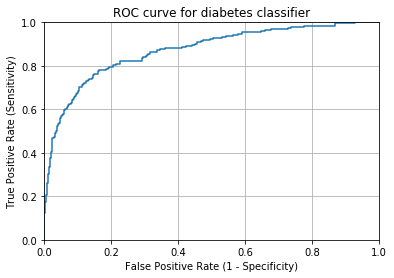

In [289]:
import sklearn
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_train['Attrition'], x_train['y_pred_class_train'])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [290]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(sklearn.metrics.roc_auc_score(y_train['Attrition'], x_train['y_pred_class_train']))

0.8709532397605793


In [291]:
x_train.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 'JobLevel',
       'MonthlyIncome', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager', 'Education_2',
       'Education_3', 'Education_4', 'Education_5', 'JobInvolvement_2',
       'JobInvolvement_3', 'JobInvolvement_4', 'EnvironmentSatisfaction_2',
       'EnvironmentSatisfaction_3', 'EnvironmentSatisfaction_4',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'WorkLifeBalance_2', 'WorkLifeBalance_3', 'WorkLifeBalance_4',
       'RelationshipSatisfaction_2', 'RelationshipSatisfaction_3',
       'RelationshipSatisfaction_4', 'PerformanceRating_4',
       'JobSatisfaction_2', 'JobSatisfaction_3', 'JobSatisfaction_4',
       'OverTime_Yes', 'Over18_Y', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Human

In [292]:
x_train.head(5)

,Age,DailyRate,DistanceFromHome,EmployeeCount,JobLevel,MonthlyIncome,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Education_2,Education_3,Education_4,Education_5,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,PerformanceRating_4,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,OverTime_Yes,Over18_Y,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,Gender_Male,y_pred_class_train,y_pred_class_train_gp
529,38,827,1,1,2,7625,80,0,10,4,9,7,8,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0.003301,0
829,33,603,9,1,2,8224,80,0,6,3,5,2,3,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0.921887,1
49,35,1229,8,1,1,2269,80,0,1,2,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0.023950,0
972,18,1124,1,1,1,1611,80,0,0,5,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0.039364,0
16,32,334,5,1,1,3298,80,2,7,5,6,2,5,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0.142232,0


KS STATISTICS

In [ ]:
#decile = pd.qcut(x_train['y_pred_class_train'], 10, labels=list(range(10,0,-1)))

In [293]:
x_train["actual_target"]=y_train

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [294]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [295]:
ks(x_train,'actual_target','y_pred_class_train')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


            min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                       
1       5.000549e-01  0.975854      91         27     46.67%         2.75%   
2       2.840194e-01  0.499150      43         74     22.05%         7.54%   
3       1.741649e-01  0.283408      21         97     10.77%         9.89%   
4       1.076162e-01  0.172669      11        106      5.64%        10.81%   
5       6.966106e-02  0.107367       7        111      3.59%        11.31%   
6       4.556883e-02  0.069259       9        108      4.62%        11.01%   
7       2.375343e-02  0.045374       5        113      2.56%        11.52%   
8       1.285690e-02  0.023585       4        113      2.05%        11.52%   
9       5.396560e-03  0.012806       3        115      1.54%        11.72%   
10      2.181820e-12  0.005289       1        117      0.51%        11.93%   

       cum_eventrate cum_noneventrate    KS  
Decile           

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,5.000549e-01,0.975854,91,27,46.67%,2.75%,46.67%,2.75%,43.9
2,2.840194e-01,0.499150,43,74,22.05%,7.54%,68.72%,10.30%,58.4
3,1.741649e-01,0.283408,21,97,10.77%,9.89%,79.49%,20.18%,59.3
4,1.076162e-01,0.172669,11,106,5.64%,10.81%,85.13%,30.99%,54.1
5,6.966106e-02,0.107367,7,111,3.59%,11.31%,88.72%,42.30%,46.4
6,4.556883e-02,0.069259,9,108,4.62%,11.01%,93.33%,53.31%,40.0
7,2.375343e-02,0.045374,5,113,2.56%,11.52%,95.90%,64.83%,31.1
8,1.285690e-02,0.023585,4,113,2.05%,11.52%,97.95%,76.35%,21.6
9,5.396560e-03,0.012806,3,115,1.54%,11.72%,99.49%,88.07%,11.4


Changing probablity cutoff value from 0.5 to 0.63 , after 5th decile Ks value decreasing , Within 5 decile it capture 75% of event rate

In [296]:
x_train['y_pred_class_train_gp1']=np.where(x_train['y_pred_class_train']>=0.62,1,0)
x_train.head(5)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Age,DailyRate,DistanceFromHome,EmployeeCount,...,actual_target,target0,bucket,y_pred_class_train_gp1
529,38,827,1,1,...,0,1,"(-0.00099999999782, 0.00534]",0
829,33,603,9,1,...,1,0,"(0.5, 0.976]",1
49,35,1229,8,1,...,0,1,"(0.0237, 0.0454]",0
972,18,1124,1,1,...,0,1,"(0.0237, 0.0454]",0
16,32,334,5,1,...,0,1,"(0.107, 0.173]",0


Classification table / confusion matrix

In [298]:
ct1=pd.crosstab(x_train['actual_target'],x_train['y_pred_class_train_gp1'])
print(ct1)

y_pred_class_train_gp1    0   1
actual_target                  
0                       966  15
1                       134  61


In [301]:
# Sensitivity
61/(61+134)

0.3128205128205128

In [302]:
#Specificity
966/(966+15)

0.9847094801223242

In [303]:
#Accuracy
(61+966)/(61+966+15+134)

0.8732993197278912

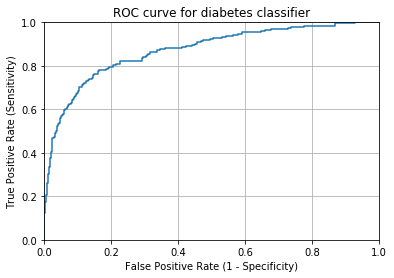

In [299]:
import sklearn
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_train, x_train['y_pred_class_train'])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [300]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(sklearn.metrics.roc_auc_score(y_train['Attrition'], x_train['y_pred_class_train']))

0.8709532397605793
